# Capstone 1 - Data Storytelling

**Kenneth Liao**
<br>**4/3/2019**

## Background

The goal of this project is to build a recommendation engine to recommend practice problems to students. The first part is to predict the number of attempts a student will require to solve a given problem. The idea is that if we can accurately predict the number of attempts a student will require to solve a problem, we can recommend a problem that is not too easy and not too hard (takes too many attempts). The data provided by Analytics Vidhya comes in three separate tables. The details of each dataset is described below.

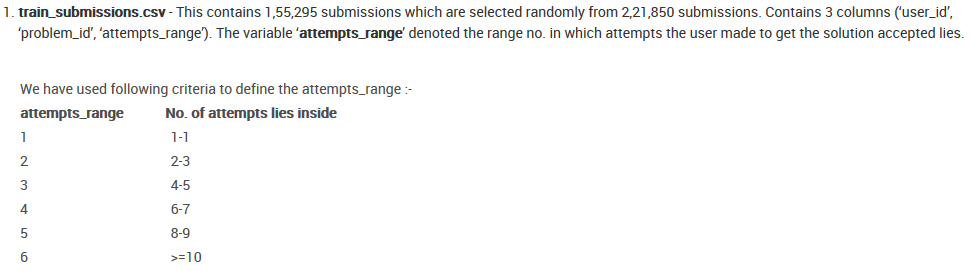

---

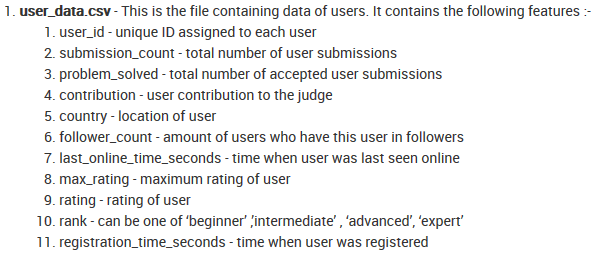

---

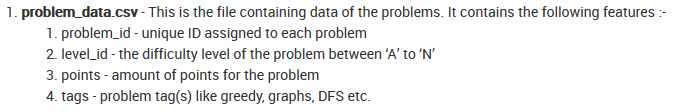

---

## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# config file contains API keys for using plotly
from config import credentials

# enable offline plotting in plotly
init_notebook_mode(connected=True)

In [15]:
# Load the submission, user, and problem datasets
data_path = r'C:\Users\Kenny\projects\Springboard\exercises\RecommenderSystem_Capstone1\data\\'

submissions = pd.read_csv(data_path + 'train_submissions.csv')
problems = pd.read_csv(data_path + 'problem_features.csv')
users = pd.read_csv(data_path + 'user_features.csv')

## train_submission Dataset

I'll start by exploring the train_submission dataset. A sample of this dataset is shown in the table below. This is also the form of the data that will be submitted for benchmarking. There are only 3 columns: user_id, problem_id, and attempts_range; see above for how the number of attempts have been binned into the attempts_range variable.

In [8]:
submissions.head(10)

user_id problem_id  attempts_range
0   user_232  prob_6507               1
1  user_3568  prob_2994               3
2  user_1600  prob_5071               1
3  user_2256   prob_703               1
4  user_2321   prob_356               1
5  user_1569  prob_6064               1
6  user_3293  prob_1237               1
7   user_915  prob_4125               2
8  user_2032  prob_1943               1
9  user_1410  prob_3935               1

In [9]:
hist = go.Histogram(
    name = 'Count',
    x=submissions.attempts_range)
line = go.Scatter(
    name='Proportion',
    x=[1,2,3,4,5,6],
    y=[.533, .305, .091, .035, .016, .020],
    yaxis='y2'
)

hist_layout = go.Layout(
    title='attempts_range Histogram',
    titlefont = dict(size=20),
    xaxis=dict(
        title='attempts_range',
        titlefont=dict(
            size=18
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18
        )
    ),
    yaxis2=dict(
        title='Proportion',
        titlefont=dict(
            size=18
        ),
        overlaying='y',
        side='right',
        tickformat= ',.1%',
        range= [0,1],
        showgrid=False
    )
)

fig = go.Figure(data=[hist, line], layout=hist_layout)

iplot(fig, filename='attempts_range histogram')

The histogram above shows both the count and proportion of completed problems by attempts_range. 53% of problems are solved in a single attempt. 30.5% of problems are solved between 2 to 3 attempts and this drops quickly to 9.1% of problems being solved in 4 to 5 attempts. Because the provided data was already binned, there is no way for us to know what proportion of problems were solved for a specific number of attempts other than 1 attempt.

In [16]:
trace1 = go.Bar(
    name = 'Unique Count in Train_Submission',
    x=['user_id', 'problem_id'],
    y=[submissions.user_id.nunique(), submissions.problem_id.nunique()],
    text=[submissions.user_id.nunique(), submissions.problem_id.nunique()],
    textposition='auto')

trace2 = go.Bar(
    name = 'Unique Count in Feature Data',
    x=['user_id', 'problem_id'],
    y=[users.user_id.nunique(), problems.problem_id.nunique()],
    text=[users.user_id.nunique(), problems.problem_id.nunique()],
    textposition='auto')

bar_layout = go.Layout(
    title='User and Problem Unique Counts',
    titlefont = dict(size=20),
    xaxis=dict(
        tickfont=dict(
            size=18
        ),
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            size=18
        )
    ),
    barmode='group'
)

fig = go.Figure(data=[trace1, trace2], layout=bar_layout)

iplot(fig, filename='attempts_range histogram')

The bar plot above shows the unique counts for user_id and problem_id in the train_submission dataset (blue) and the feature data (orange). The feature data are just the other two tables, one for users and one for problems. We can see that the feature data has a higher unique count in both cases. This is what we would expect since the user and problem meta data should be collected for every user and problem. But not every user will necessarily have solved at least one problem and not ever problem will necessarily have been solved at least once, these would thus not be included in the train_submission data. 

In [25]:
set(submissions.user_id.unique()).difference(set(users.user_id.unique()))

set()

We can see from the above set difference that all user_ids in the submissions dataset are in fact present in the users dataset.

In [27]:
set(submissions.problem_id.unique()).difference(set(problems.problem_id.unique()))

{'prob_1011',
 'prob_1068',
 'prob_1102',
 'prob_1209',
 'prob_1221',
 'prob_1233',
 'prob_1309',
 'prob_1321',
 'prob_1420',
 'prob_145',
 'prob_1535',
 'prob_1617',
 'prob_1748',
 'prob_1786',
 'prob_181',
 'prob_1884',
 'prob_2069',
 'prob_2147',
 'prob_2193',
 'prob_2464',
 'prob_2511',
 'prob_2547',
 'prob_2558',
 'prob_2673',
 'prob_284',
 'prob_2841',
 'prob_2974',
 'prob_3057',
 'prob_3284',
 'prob_3326',
 'prob_3329',
 'prob_3356',
 'prob_3412',
 'prob_3589',
 'prob_3812',
 'prob_3822',
 'prob_3904',
 'prob_3931',
 'prob_3982',
 'prob_4056',
 'prob_4254',
 'prob_4423',
 'prob_4537',
 'prob_4565',
 'prob_459',
 'prob_4635',
 'prob_4847',
 'prob_4852',
 'prob_4968',
 'prob_4990',
 'prob_5009',
 'prob_5113',
 'prob_5351',
 'prob_5515',
 'prob_5523',
 'prob_5543',
 'prob_5567',
 'prob_5614',
 'prob_572',
 'prob_5760',
 'prob_5768',
 'prob_5845',
 'prob_5873',
 'prob_5933',
 'prob_5944',
 'prob_5946',
 'prob_6015',
 'prob_6243',
 'prob_628',
 'prob_6324',
 'prob_6384',
 'prob_646',

In [29]:
problems[problems.problem_id == 'prob_1011']

Empty DataFrame
Columns: [problem_id, level_type, points, problem_attempts_median, problem_attempts_min, problem_attempts_max, problem_attempts_count, problem_attempts_iqr, algorithms, and, binary, bitmasks, brute, chinese, combinatorics, conquer, constructive, data, dfs, divide, dp, dsu, expression, fft, flows, force, games, geometry, graph, graphs, greedy, hashing, implementation, in, matchings, math, matrices, meet, middle, null, number, parsing, paths, pointers, probabilities, remainder, sat, schedules, search, shortest, similar, sortings, special, string, strings, structures, suffix, ternary, the, theorem, theory, trees, two]
Index: []

[0 rows x 63 columns]

In [18]:
def create_hists(df, cols, xlog=False, ylog=False):
    for i in range(len(cols)):
        
        trace = go.Histogram(
                    name = cols[i],
                    x=df[cols[i]])
        
        if xlog:
            xlog='log'
        else:
            xlog='linear'
        if ylog:
            ylog='log'
        else:
            ylog='linear'
        
        layout = go.Layout(
                    title='%s Histogram' % cols[i],
                    titlefont = dict(size=20),
                    xaxis=dict(
                        type=xlog,
                        autorange=True,
                        title='%s' % cols[i],
                        titlefont=dict(
                            size=18
                        )
                    ),
                    yaxis=dict(
                        type=ylog,
                        autorange=True,
                        title='Count',
                        titlefont=dict(
                            size=18
                        )
                    )
                )
        
        fig = go.Figure(data=[trace], layout=layout)

        iplot(fig, filename='%s Histogram' % cols[i])

## User Data

In [95]:
users.head(10)

user_id_number  submission_count  problem_solved  contribution     country  \
0               1                84              73            10  Bangladesh   
1               2               688             599            -8       India   
2               3               223             166            29      Russia   
3               4               129              87             0     Romania   
4               5               622             528             0  Uzbekistan   
5               6               153             126             0        None   
6               7                82              74             1     Vietnam   
7               8               226             175             0       India   
8               9               391             362             0       China   
9              10               246             211             0        None   

   follower_count  last_online_time_seconds  max_rating   rating  \
0             120                1505162220     502.007  499.713   
1             193                1505521189     402.236  341.743   
2              12                1505567479     415.138  415.138   
3               9                1504333082     389.622  389.622   
4              82                1504896360     447.248  428.039   
5              12                1505226652     304.759  251.720   
6               4                1502435912     352.351  314.220   
7              26                1505566602     323.108  286.124   
8              14                1505560476     503.440  456.995   
9              30                1505079658     326.548  313.360   

           rank  registration_time_seconds  user_attempts_median  \
0      advanced                 1469108674                   1.0   
1  intermediate                 1439035856                   2.0   
2  intermediate                 1427557033                   1.0   
3  intermediate                 1355046326                   1.0   
4  intermediate                 1429519005                   1.0   
5      beginner                 1469728659                   1.0   
6  intermediate                 1457275295                   2.0   
7      beginner                 1469947695                   1.0   
8      advanced                 1442291755                   2.0   
9  intermediate                 1472038187                   1.0   

   user_attempts_min  user_attempts_max  user_attempts_count  \
0                1.0                3.0                 60.0   
1                1.0                6.0                 42.0   
2                1.0                5.0                 50.0   
3                1.0                6.0                 35.0   
4                1.0                6.0                 32.0   
5                1.0                4.0                 74.0   
6                1.0                6.0                 45.0   
7                1.0                5.0                 62.0   
8                1.0                6.0                 23.0   
9                1.0                3.0                 51.0   

   user_attempts_iqr  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  
5                0.0  
6                0.0  
7                0.0  
8                0.0  
9                0.0

In [96]:
create_hists(users, cols=['submission_count'])

In [97]:
create_hists(users, cols=['problem_solved'])

In [98]:
trace = go.Scatter(
            name = 'Problems submitted vs solved',
            x=users.submission_count,
            y=users.problem_solved,
            mode='markers')

layout = go.Layout(
            title='Problems submitted vs solved',
            titlefont = dict(size=20),
            xaxis=dict(
                title='submission_count',
                titlefont=dict(
                    size=18
                )
            ),
            yaxis=dict(
                title='problem_solved',
                titlefont=dict(
                    size=18
                )
            )
        )

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='submission_count vs problem_solved')

In [99]:
def highlight(s, threshold=0.9):
    '''
    highlight the cell if the value is greater than the threshold but not equal to 1
    '''
    is_90 = (abs(s) > threshold) & (s != 1) 
    return ['background-color: red' if v else '' for v in is_90]

In [100]:
user_correlations = users.corr()
user_correlations.style.apply(lambda x: highlight(x), axis = 1)

In [101]:
create_hists(users, cols=['contribution'], ylog=True)

In [102]:
create_hists(users, cols=['follower_count'], ylog=True)

In [103]:
create_hists(users, cols=['last_online_time_seconds'])

In [104]:
create_hists(users, cols=['max_rating'])

In [105]:
create_hists(users, cols=['rating'])

In [106]:
trace = go.Scatter(
            name = 'Rating vs Max Rating',
            x=users.max_rating,
            y=users.rating,
            mode='markers')

layout = go.Layout(
            title='Rating vs Max Rating',
            titlefont = dict(size=20),
            xaxis=dict(
                title='Max Rating',
                titlefont=dict(
                    size=18
                )
            ),
            yaxis=dict(
                title='Rating',
                titlefont=dict(
                    size=18
                )
            )
        )

fig = go.Figure(data=[trace], layout=layout)

iplot(fig, filename='Rating vs Max Rating')

There is a natural upper bound where for each user, the rating cannot be higher than the maximum rating they had. The upper bound corresponds to users with a rating equal to their current maximum rating.

In [107]:
create_hists(users, cols=['registration_time_seconds'])

In [108]:
create_hists(users, cols=['user_attempts_median'], ylog=True)

In [109]:
create_hists(users, cols=['user_attempts_min'], ylog=True)

In [110]:
create_hists(users, cols=['user_attempts_max'])

In [111]:
create_hists(users, cols=['user_attempts_count'])

In [112]:
create_hists(users, cols=['user_attempts_iqr'], ylog=True)

## Problems

In [140]:
problem_correlations = problems.loc[:, 'points': 'problem_attempts_iqr'].corr()
problem_correlations.style.apply(lambda x: highlight(x), axis = 1)

In [135]:
problem_levels = problems[['level_type', 'problem_id_number']].groupby('level_type').count()

In [136]:
data = [
  go.Bar(
    y = problem_levels.problem_id_number,
    x = problem_levels.index,
    name = "count"
  )
]

iplot(data, filename='binning function')

In [138]:
create_hists(problems, cols=['points'])

In [146]:
create_hists(problems, cols=['problem_attempts_median'], ylog=True)

In [147]:
create_hists(problems, cols=['problem_attempts_min'], ylog=True)

In [148]:
create_hists(problems, cols=['problem_attempts_max'], ylog=True)

In [149]:
create_hists(problems, cols=['problem_attempts_count'], ylog=True)

In [150]:
create_hists(problems, cols=['problem_attempts_iqr'], ylog=True)